This notebook is similar to IsolationForest.ipynb in that it demonstrates a use case of the EIF. However, unlike the other notebook, we demonstrate a use case for three dimensional data. 

# Imports

In [6]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import eif as iso
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed

In [10]:
iso.__version__

'1.0.2'

iso.__version__

## Generate Data

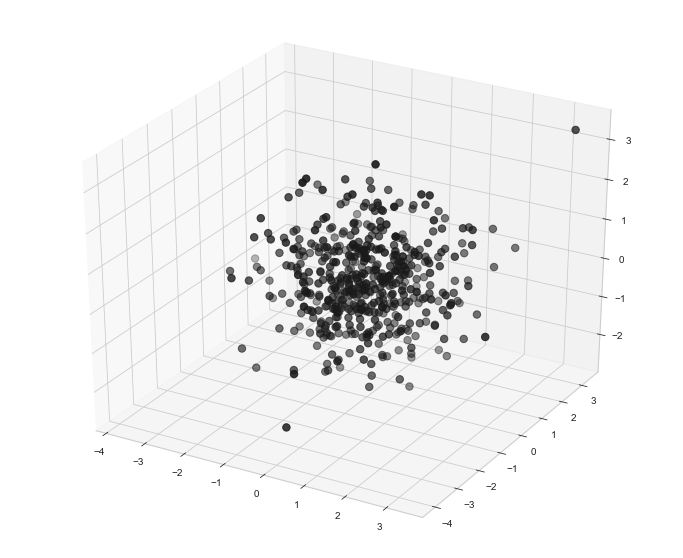

In [7]:
mean = [0, 0, 0]
cov = [[1, 0, 0], [0, 1, 0],[0, 0, 1]]  # diagonal covariance
Nobjs = 500
x, y, z = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
z[0]=3.3
X=np.array([x,y,z]).T

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,s=55,c='k')
plt.show()

## Trees and training

Now that we are working with three dimensional data, there are two extension levels to the standard isolation Forest. The extension level 2 is of course the fully extended case. We provide examples for each extension level.

In [8]:
sample = 256
F0 = iso.iForest(X,ntrees=500, sample_size=sample, ExtensionLevel=0) # Extension level 0 is the same as the standard Isolation Forest. 
F1 = iso.iForest(X,ntrees=500, sample_size=sample, ExtensionLevel=1)
F2 = iso.iForest(X,ntrees=500, sample_size=sample, ExtensionLevel=2)

## Scores and distributions

In [9]:
S0 = F0.compute_paths(X_in=X)
S1 = F1.compute_paths(X_in=X)
S2 = F2.compute_paths(X_in=X)

The distribution of anomaly scores are shown. By definition, anomalies are those that occur less frequently. So it makes sense that the number of points with higher anomaly scores reduces as the score increases. 

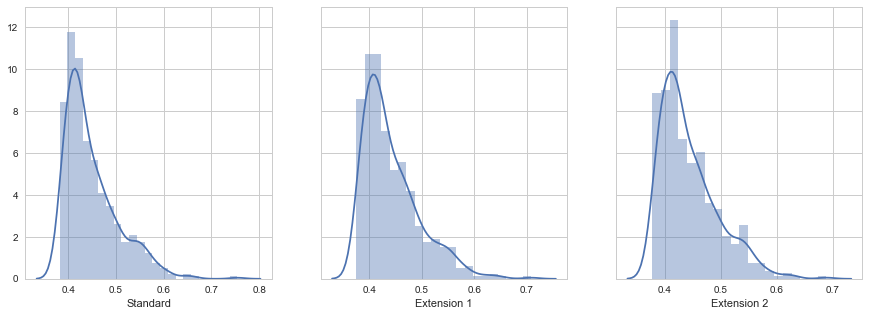

In [13]:
f, ax1 = plt.subplots(1,3,figsize=(15,5),sharey=True)

sb.distplot(S0, kde=True, color="b", ax=ax1[0], axlabel='Standard')
sb.distplot(S1, kde=True, color="b", ax=ax1[1], axlabel='Extension 1')
sb.distplot(S2, kde=True, color="b", ax=ax1[2], axlabel='Extension 2')

plt.show()

Here we plot the points and highlight a 10 points with highest and 10 points with lowest anomaly scores. The two plots provide a comparison between the two algorithms.

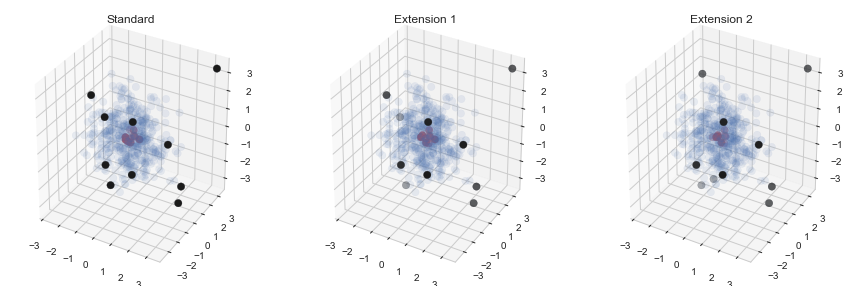

In [14]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)
ss2=np.argsort(S2)

f = plt.figure(figsize=(15,5))
ax0 = f.add_subplot(131, projection='3d')
ax0.scatter(x,y,z,s=55,c='b',alpha=0.1)
ax0.scatter(x[ss0[-10:]],y[ss0[-10:]],z[ss0[-10:]],s=55,c='k',alpha=1)
ax0.scatter(x[ss0[:10]] ,y[ss0[:10]] ,z[ss0[:10]] ,s=55,c='r')
plt.title('Standard')

ax1 = f.add_subplot(132, projection='3d')
ax1.scatter(x,y,z,s=55,c='b',alpha=0.1)
ax1.scatter(x[ss1[-10:]],y[ss1[-10:]],z[ss1[-10:]],s=55,c='k')
ax1.scatter(x[ss1[:10]] ,y[ss1[:10]] ,z[ss1[:10]] ,s=55,c='r')
plt.title('Extension 1')

ax2 = f.add_subplot(133, projection='3d')
ax2.scatter(x,y,z,s=55,c='b',alpha=0.1)
ax2.scatter(x[ss2[-10:]],y[ss2[-10:]],z[ss2[-10:]],s=55,c='k')
ax2.scatter(x[ss2[:10]] ,y[ss2[:10]] ,z[ss2[:10]] ,s=55,c='r')
plt.title('Extension 2')

plt.show()